In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
matches=pd.read_csv('matches.csv')
matches.info()
matches.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
id                 756 non-null int64
season             756 non-null int64
city               749 non-null object
date               756 non-null object
team1              756 non-null object
team2              756 non-null object
toss_winner        756 non-null object
toss_decision      756 non-null object
result             756 non-null object
dl_applied         756 non-null int64
winner             752 non-null object
win_by_runs        756 non-null int64
win_by_wickets     756 non-null int64
player_of_match    752 non-null object
venue              756 non-null object
umpire1            754 non-null object
umpire2            754 non-null object
umpire3            119 non-null object
dtypes: int64(5), object(13)
memory usage: 106.4+ KB


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-17,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-17,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-17,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-17,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-17,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
matches.head(7)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-17,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-17,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-17,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-17,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-17,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,09-04-17,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,09-04-17,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [4]:
matches[pd.isnull(matches['winner'])]
#find all NaN values in winner column, so that we update this as draw

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,21-05-11,Delhi Capitals,Pune Warriors,Delhi Capitals,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,29-04-15,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,17-05-15,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,2019,Bengaluru,30-04-19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


In [5]:
matches['winner'].fillna('Draw', inplace=True)

In [6]:
matches.loc[300,'winner']

'Draw'

In [7]:
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Delhi Capitals','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Rising Pune Supergiant','Kochi Tuskers Kerala','Pune Warriors']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','DD','GL','KXIP','SRH','RPS','RPS','KTK','PW'],inplace=True)


matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-17,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-17,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [8]:
encode = {'team1': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'team2': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'toss_winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13,'Draw':14}}
matches.replace(encode, inplace=True)
matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-17,10,3,3,field,normal,0,10,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-17,1,11,11,field,normal,0,11,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [9]:
#Find cities which are null
matches[pd.isnull(matches['city'])]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,19-04-14,1,3,3,field,normal,0,3,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,19-04-14,2,7,2,bat,normal,0,7,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,23-04-14,5,6,6,field,normal,0,5,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,25-04-14,10,7,10,bat,normal,0,10,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,25-04-14,1,5,1,bat,normal,0,5,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,28-04-14,3,9,9,field,normal,0,9,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,30-04-14,10,1,1,field,normal,0,10,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [10]:
#remove any null values, winner has hence fill the null value in winner as draw
#City is also null, this is mainly for Dubai stadium. Hence update the City as Dubai
#Make sure to impute the data(cleansing and finding missing data), there is also other process 
#to verify expected value based on other resultants, for now by stadium, city is easily manually updated
matches['city'].fillna('Dubai',inplace=True)
matches.describe()
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
id                 756 non-null int64
season             756 non-null int64
city               756 non-null object
date               756 non-null object
team1              756 non-null int64
team2              756 non-null int64
toss_winner        756 non-null int64
toss_decision      756 non-null object
result             756 non-null object
dl_applied         756 non-null int64
winner             756 non-null int64
win_by_runs        756 non-null int64
win_by_wickets     756 non-null int64
player_of_match    752 non-null object
venue              756 non-null object
umpire1            754 non-null object
umpire2            754 non-null object
umpire3            119 non-null object
dtypes: int64(9), object(9)
memory usage: 106.4+ KB


In [11]:

#team_match_total=matches.groupby(["team1"]).size()+matches.groupby(["team2"]).size()
#print(team_match_total.get_value(1))
xx=matches.groupby(["toss_winner"]).size()
print(xx.get_value(1))
yy=matches.groupby(["winner"]).size()
print(yy.get_value(1))

98
109


c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [12]:
#we maintain a dictionary for future reference mapping teams
dicVal = encode['winner']
print(dicVal['MI']) #key value
print(list(dicVal.keys())[list(dicVal.values()).index(1)]) #find key by value search 

1
MI


In [13]:
matches = matches[['team1','team2','city','toss_decision','toss_winner','venue','winner']]
matches.head(2)

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,10,3,Hyderabad,field,3,"Rajiv Gandhi International Stadium, Uppal",10
1,1,11,Pune,field,11,Maharashtra Cricket Association Stadium,11


In [14]:
df = pd.DataFrame(matches)
df.describe()

,team1,team2,toss_winner,winner
count,756.000000,756.000000,756.000000,756.000000
mean,5.498677,5.511905,5.370370,5.318783
std,3.307026,3.274807,3.218386,3.264940
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,2.000000,2.000000
50%,5.000000,5.000000,5.000000,5.000000
75%,9.000000,8.000000,7.000000,8.000000
max,13.000000,13.000000,13.000000,14.000000


In [15]:
#33 cities
df["city"].unique()


array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
       'Dubai', 'Mohali', 'Bengaluru'], dtype=object)

In [16]:
#35 venues
df["venue"].unique()

array(['Rajiv Gandhi International Stadium, Uppal',
       'Maharashtra Cricket Association Stadium',
       'Saurashtra Cricket Association Stadium', 'Holkar Cricket Stadium',
       'M Chinnaswamy Stadium', 'Wankhede Stadium', 'Eden Gardens',
       'Feroz Shah Kotla',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Green Park', 'Punjab Cricket Association Stadium, Mohali',
       'Sawai Mansingh Stadium', 'MA Chidambaram Stadium, Chepauk',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed V

In [17]:
cat_list=df["city"]
encoded_data, mapping_index = pd.Series(cat_list).factorize()
print(encoded_data)
print(mapping_index)
print(mapping_index.get_loc("Visakhapatnam"))

[ 0  1  2  3  4  0  5  3  1  5  6  4  2  6  7  5  4  7  0  2  0  3  6  5
  1  2  6  5  1  4  6  8  1  2  8  0  5  1  7  6  7  4  0  7  4  8  0  8
  9  5  7  9  6  1  7  5  4  4  0  4  8  7  5  6 10  0 11  0  8  4 11  5
  8  4  6  7  0 10 11  0  8  5 10  4 11  5  7  6 10  4 11  0 10  8  6  5
  8  7  5  7 10  0  6  4  6  5 11  8  7 11  4  6 10  0  5  5  5 12 12 12
 12 13 14 12 14 12 14 14 13 12 14 13 15 14 14 15 15 16 14 13 17 13 17 16
 14 14 15 15 15 16 18 18 13 17 18 15 15 14 14 14 19 13 17 17 19 15 17 14
 14 15 15 15 17 17  5  5  8  6 11 20  4  6  7  4  7 21 20  5 21 11  5  4
  8  5 20  8  4 20  5  7  5 11  7  6  8 11  5  6  7 22 11 10  6  4  8 22
  4  7 10 22  5 11 10 11 23  4  6 23  7  6  5  5  5  5 11  0 24  7  5  6
 10  4  8  5  0 10  5 11  0  5  6 24  7  5  6  8  5  6  7  0 10 11  7  5
 24  7 10  4 24  6 10 11  5  7  0 11  5 24  0  4  6  5  4  8 10  0  8 10
 11  3  4  5 23  3  5 23 11  5  5 23  7  4  6  5  5 11 11 11  6  5 10  4
 25 10  1 25  4  7  5 11  8  6  7  1  6  4  5 10  4

In [18]:
cat_list1=df["venue"]
encoded_data1, mapping_index1 = pd.Series(cat_list1).factorize()
print(encoded_data1)
print(mapping_index1)
print(mapping_index1.get_loc("Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium"))

[ 0  1  2  3  4  0  5  3  1  5  6  4  2  6  7  5  4  7  0  2  0  3  6  5
  1  2  6  5  1  4  6  8  1  2  8  0  5  1  7  6  7  4  0  7  4  8  0  8
  9  5  7  9  6  1  7  5  4  4  0  4 10  7  5  6 11  0 12  0 10  4 12 13
 10  4  6  7  0 11 12  0 10 13 11  4 12 13  7  6 11  4 12  0 11 10  6  5
 10  7  5  7 11  0  6  4  6  5 12 10  7 12  4  6 11  0  5  5 13 14 14 14
 14 15 16 14 16 14 16 16 15 14 16 15 17 16 16 17 17 18 16 15 19 15 19 18
 16 16 17 17 17 18 20 20 15 19 20 17 17 16 16 16 21 15 19 19 21 17 19 16
 16 17 17 17 19 19 13 22 10  6 12 23  4  6  7  4  7 24 23 22 24 12 22  4
 10 22 23 10  4 23 13  7 22 12  7  6 10 12 22  6  7 25 12 11  6  4 10 25
  4  7 11 25 22 12 11 12 26  4  6 26  7  6 13 13 13 13 12  0 27  7 13  6
 11  4 10 13  0 11  5 12  0 13  6 27  7  5  6 10  5  6  7  0 11 12  7 13
 27  7 11  4 27  6 11 12  5  7  0 12 13 27  0  4  6  5  4 10 11  0 10 11
 12  3  4  5 26  3 13 26 12 13  5 26  7  4  6  5  5 12 12 12  6  5 11  4
 28 11 29 28  4  7  5 12 10  6  7 29  6  4  5 11  4

In [19]:
cat_list2=df["toss_decision"]
encoded_data2, mapping_index2 = pd.Series(cat_list2).factorize()
#print(encoded_data2)
print(mapping_index2)
print(mapping_index2.get_loc("field"))

Index(['field', 'bat'], dtype='object')
0


In [20]:
#Find some stats on the match winners and toss winners
temp1=df['toss_winner'].value_counts(sort=True)
temp2=df['winner'].value_counts(sort=True)
#Mumbai won most toss and also most matches
print('No of toss winners by each team')
for idx, val in temp1.iteritems():
   print('{} -> {}'.format(list(dicVal.keys())[list(dicVal.values()).index(idx)],val))
print('No of match winners by each team')
for idx, val in temp2.iteritems():
   print('{} -> {}'.format(list(dicVal.keys())[list(dicVal.values()).index(idx)],val))

No of toss winners by each team
MI -> 98
KKR -> 92
DD -> 90
CSK -> 89
KXIP -> 81
RCB -> 81
RR -> 80
SRH -> 46
DC -> 43
PW -> 20
GL -> 15
RPS -> 13
KTK -> 8
No of match winners by each team
MI -> 109
CSK -> 100
KKR -> 92
RCB -> 84
KXIP -> 82
DD -> 77
RR -> 75
SRH -> 58
DC -> 29
RPS -> 15
GL -> 13
PW -> 12
KTK -> 6
Draw -> 4


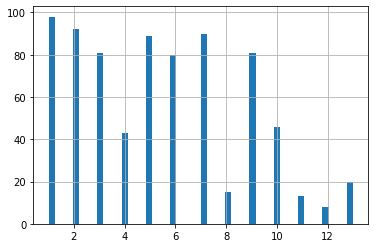

In [21]:
df['toss_winner'].hist(bins=50)

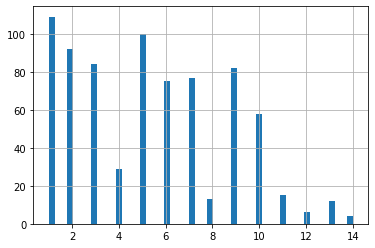

In [22]:
#shows that Mumbai won most matches followed by Chennai
df['winner'].hist(bins=50)

Text(0.5, 1.0, 'Match winners')

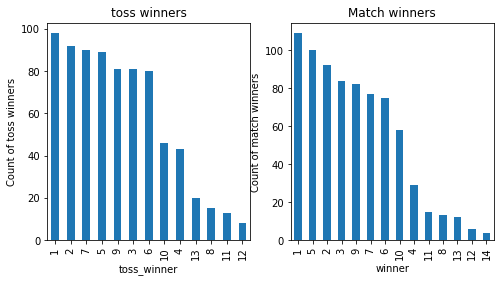

In [25]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('toss_winner')
ax1.set_ylabel('Count of toss winners')
ax1.set_title("toss winners")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('winner')
ax2.set_ylabel('Count of match winners')
ax2.set_title("Match winners")

In [26]:
 df.apply(lambda x: sum(x.isnull()),axis=0) 
    #find the null values in every column

team1            0
team2            0
city             0
toss_decision    0
toss_winner      0
venue            0
winner           0
dtype: int64

In [27]:
#Find cities which are null
df[pd.isnull(df['city'])]

,team1,team2,city,toss_decision,toss_winner,venue,winner


In [28]:
#building predictive model , convert categorical to numerical data
from sklearn.preprocessing import LabelEncoder
var_mod = ['city','toss_decision','venue']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df 

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,10,3,15,1,3,28,10
1,1,11,27,1,11,21,11
2,8,2,29,1,2,31,2
3,11,9,16,1,9,13,9
4,3,7,2,0,3,17,3
5,8,10,15,1,10,28,10
6,2,1,24,1,1,40,1
7,3,9,16,0,3,13,9
8,7,11,27,1,11,21,7
9,10,1,24,1,1,40,1


In [29]:
df.head(10)

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,10,3,15,1,3,28,10
1,1,11,27,1,11,21,11
2,8,2,29,1,2,31,2
3,11,9,16,1,9,13,9
4,3,7,2,0,3,17,3
5,8,10,15,1,10,28,10
6,2,1,24,1,1,40,1
7,3,9,16,0,3,13,9
8,7,11,27,1,11,21,7
9,10,1,24,1,1,40,1


In [30]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
# from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
      model.fit(data[predictors],data[outcome])
      predictions = model.predict(data[predictors])
      print(predictions)
      accuracy = metrics.accuracy_score(predictions,data[outcome])
      print('Accuracy : %s' % '{0:.3%}'.format(accuracy))

  

In [31]:
#logistic Regression
outcome_var=['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
model =LogisticRegression()
classification_model(model, df,predictor_var,outcome_var)

[ 9  5  1  9  5  9  1  5 10  1  2  3  9  7  7  1  9  5  9  1  6  2  2  1
 10  9  2  9  2  3  2  9  2  1  9  9  1 10  9  7  9  9  9  3  3  9  5  9
  9  1  7  9  1 10  5  9  9  3  5  3  5  5  1  2  6  5  3  6  9  3  5  2
  9  3  1  2  6  1  5  1  6  2  6  3  3  2  9  2  1  3  9  1  9  5  2  1
  9  2  1  7  1  1  2  3  2  1  5  6  3  5  3  2  1  5  6  6  2  3  5  9
  1  1  2  5  5  3  5  1  1  6  2  1  6  1  5  6  6  2  5  1  9  1  1  2
  9  5  1  6  6  5  7  2  1  1  2  1  6  9  5  2  9  1  1  9  5  6  5  2
  5  6  6  6  1  1  2  2  9  2  5  9  3  2  3  3  5  7  6  2  7  9  2  3
  9  2  6  5  3  6  2  5  2  5  5  2  6  5  2  5  5  1  1  6  2  3  5  1
  3  7  1  1  2  5  1  5  9  3  2  9  5  1  2  2  2  2  5  6  5  2 10  2
  6  3  9 10  1  1  6  5  6 10  2  9  5  6  2  9  1  2  9  1  9  9  2  7
  9  3  1  9 10  2  9  5  1  9  1  5  7  9  6  3  2  1  5 10  6 10  9  1
  5  9  3  1  9  9  2  5 10  2  1  7 10  3  1  1  1  1  5  3  2  9  9  3
  2  1 10  2  3  7  1  5  9  2  5 10  2  3  1  5  6

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [32]:
#Gaussian NAive bayes algorithm
from sklearn.naive_bayes import GaussianNB
outcome_var=['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
model = GaussianNB() 
classification_model(model, df,predictor_var,outcome_var)

[12 12 12 12  5 12  1  5 12 12 12  3 12 12  7 12  3  5 12 12 10 12 12 12
 12 12 12 12 12  8 12 12 12  1 12 12  1 12 12 12 12  3 12 12  3 12  1 12
 12 12  7 12 12 12  5 12  3  3  1  3  5  5  1  2  6  5 12 12 12  3  5 12
  5  5  2 12 12  5  5  5  6 12  6  3 12 12 12  2 12  3 12  1 12  5  2 12
 12 12  1  7 12 12  2  3 12 12  5 12 12  5  3  2 12  5 12  6 12  3  5  9
  3  1 12  5  5  3  5  2  1  6 12  1  6  2  2  6  6  2  5  1 12  1  1  5
 12  5  1  6  6  2 12  5  1 12  5  1  6 12  5  5  9  1 12 12  6  5  5 12
  5  6  1  6 12 12 12  2 12 12  5  6  3  2 12  3  5 12  5  2  5 12  2  3
 12 12  5  5  3  6 12  5 12  5  5  2  6  5  2  2  5  6  5  6  2  3  1  1
  3  7 12 12  2  5  6  5 12  3  2 12  5  2  2  2  2  2  5 12 10  2 13  2
  6  3 12 13 12 12 12  5 12 12 12 12  5 13 12 12 12 12 12 12 12 12 12 13
 12 12 12 12 10 12 12  5 12 12 12  5 12 12 12  3  2 12  9 10 12 10 12 12
  5 12  3  1 12 12 12  7 10 12  1 12 10  3 12 12  1  3  5 12 12 12 12  3
 12 12 13  2  3 12 12  5 12  2  5 10 12  5 12  5 10

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
#applying knn algorithm
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
classification_model(model, df,predictor_var,outcome_var)

[10  3  3  9  3 10  1  9 11  1  2  1  9  2  9  9  3  2 10  3 10  1  8  1
 11  9  2 11  2  3  2 10  2  1  9 10  1 11  7  2  7  9  9  1  2  8 10  9
  7  9 10  7  1 11  4 11  2  1 10  3  5  7  1  2  6  7  5  6  9  6  5  1
  9  3  1  3  9  6  5  4  2  1  6  9  5  1  5  2  6  1  5  2  6  9  2  1
  9  7  1  9  2  1  5  7  6  9  5  9  1  5  3  2  6  7  6  1  6  1  1  9
  4  4  2  4  7  2  3  3  2  7  3  1  5  4  9  5  5  1  3  5  3  2  4  5
  5  3  2  5  5  7  9  4  1  4  4  3  1  3  4  3  9  1  4  3  7  4  3  2
  3  7  3  2  4  4  1  1  9  2  3  6  3  2  1  3  5  4  6  1  4  5  1  3
  9  1  6  1  3  6  1  2  1  5  7  2  2  5  1  2  2  6  1  6  2  3  1  4
  3  9  6  4  1  5  6  5  4  1  2  4  4  2  1  3  2  5  2  6  3  1 13  2
  6  1  9 13  4  2  1  5  9  4  2  4  4  1  2  9  5  2  9  1  6  5  3  2
  4  3  6  3  7  2  6  5  1 10  1  5  1  2  6  9  2  1  3 10  6 10  9  2
  5  9  3  1  9  9  2  5  5  2  1  4  7  3  1  5  1  1  5  5  7 11  6  7
  1  2 13  1  3  7  1  5  9  2  4  4  2  3  1  6  3

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


In [34]:
df.head(3)

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,10,3,15,1,3,28,10
1,1,11,27,1,11,21,11
2,8,2,29,1,2,31,2


In [35]:
#Import Library
from sklearn import svm
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create SVM classification object 
model = svm.SVC(kernel='rbf', C=1, gamma=1) 
outcome_var=['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
# there is various option associated with it, like changing kernel, gamma and C value. Will discuss more # about it in next section.Train the model using the training sets and check score
classification_model(model, df,predictor_var,outcome_var)

[10 11  2  9  3 10  1  9  7  1  2  1  8  2  9  1  3  2 10  3 10  1  8  1
 11  9  3 11  2  3  2 10 11  1  9 10  1 11  7 11  7  9 11  1  2  8 10  9
  7  9  7 10  1 11  3 11  2  1  1  3  5  7  1  2  6  7  5  6  9  6  5  1
  9  5  1  3  9  6  5  3  9  1  6  3  4  1  5  2  6  1  5  2  6  9  2  1
  9  7  1  9  6  1  5  3  6  9  5  9  1  5  3  2  6  5  6  5  6  1  3  7
  4  5  2  4  7  6  9  4  7  9  4  1  6  3  9  7  5  1  9  6  5  9  3  5
  6  7  4  6  5  7  9  5  1  7  4  3  1  7  3  6  9  5  4  9  7  2  3  2
  5  7  3  4  3  4  2  1  7  2  4  7  3  2  1  3  5  4  6  3  4  9  1  3
  6  1  6  2  3  6  1  2  1  5  7  2  3  5  1  9  7  6  5  6  2  3  1  4
  3  9  6  4  1  5  6  5  4  1  2  5  4  1  1  5  3  5  2  6  3  7 13  2
  6  1  9 13  4  2 12  5  9  7  2  5  4  1 12  9  1  3  9  1  6  5  3  5
  4  2  6  3  7  2  6  5  1 12  2  5  1 12  7  3  2  1  3 13  6 13  9  6
  5  9  3  4  9 12  4  9  5  2  6  4 14  3  1  5  1  3  5  5  7 13  6  3
  5  2  9  1  3  7  1  5  9  2  4  5  2  6  1  6  3

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
#Gradient boost algorithm
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=0)
classification_model(model, df,predictor_var,outcome_var)

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[10 11  2  9  3 10  1  9  7  1  2  1  8  2  9  1 11  2 10  3 10  1  8  1
 11  9  3 11  2  8  2 10 11  1  9 10  1 11  7 11  7  9 11  1  2  8 10  9
  7  9  7 10  1 11  3 11  2  1  1  3  5  7  1  2  6  7  5  6  9 14  5  1
  9  5  1  3  9  6  5  3  2  1  6  3  4  1  5  2  6  1  5  2  6  9  2  1
  9  7  1  9  3  1  5  3  6  9  5  9  1  5  3  2  6  5  6  5  6  1  3  7
  4  5  2  4  7  6  9  4  7  9  4  1  6  3  9  7  5  1  9  6  5  9  3  5
  6  7  4  6  5  7  9  5  1  7  4  3  1  7  3  6  9  5  4  9  7  2  3  2
  5  7  3  4  3  4  2  1  7  2  4  7  3  2  1  3  5  4  6  3  4  9  1  3
  6  1  6  2  3  6  1  2  1  5  7  2  3  5  1  9  7  6  1  6  2  3  1  4
  3  9  6  4  1  5  6  5  4  1  2  5  4  2  1  5  3  5  2  6  3  7 13  2
  6  1  9 13  4  2 12  5  9  7  2 12  4  1 12  9  5  3  9  1  6  5  3  5
  4  2  6  3  7  2  6  5  1 12  2  5  1 12  7  3  2  1  3 13  6 13  9  3
  5  9  3  4  9 12  4  9  5  2  6  4 14  3  1  5  1  3  5  5  7 13  6  3
  5  2 13  1  3  7  1  5  9  2  4  5  2  6  1  6  3

In [38]:
#Decision tree algorithm
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='gini')
outcome_var=['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
classification_model(model, df,predictor_var,outcome_var)

[10 11  2  9  3 10  1  9  7  1  2  1  8  2  9  1  3  2 10  3 10  1  8  1
 11  9  3 11  2  3  2 10 11  1  9 10  1 11  7 11  7  9 11  1  2  8 10  2
  7  9  7 10  1 11  3 11  2  1  1  3  5  6  1  2  6  7  1  6  9  6  5  1
  9  5  1  3  9  6  5  3  2  1  6  3  4  1  5  2  6  1  5  2  6  9  2  1
  9  7  1  9  3  1  5  3  6  9  5  9  1  5  3  2  6  5  6  5  6  1  3  7
  4  5  2  4  7  6  3  4  7  9  4  1  6  3  9  7  5  1  3  6  5  9  3  5
  6  7  4  6  5  7  9  5  1  7  4  3  1  7  3  6  9  5  4  9  7  2  3  2
  5  7  3  4  3  4  2  1  7  2  4  6  3  2  1  3  5  4  6  3  4  9  1  3
  6  1  6  2  3  6  1  2  1  5  7  2  3  5  1  9  7  6  1  6  2  3  1  4
  3  9  6  4  1  5  3  5  4  1  2  5  4  1  1  5  3  5  2  6  3  1 13  2
  6  1  9 13  4  2 12  5  9  7  2 12  4  1 12  9  1  3  9  1  6  5  3  5
  4  2  6  3  7  2  6  5  1 12  2  5  1 12  7  3  2  1  3 13  5 13  9  3
  5  9  3  4  9 12  4  9  5  2  6  4 14  3  1  5  1  3  5  1  7 13  6  3
  5  2  9  1  3  7  1  5  9  2  4  5  2  6  1  6  3

In [39]:
#Random forest classifier
model = RandomForestClassifier(n_estimators=100)
outcome_var = ['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
classification_model(model, df,predictor_var,outcome_var)

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


[10 11  2  9  3 10  1  9  7 10  2  1  8  2  9  1  3  2 10  3 10  1  8  1
 11  9  3 11  2  8  2 10 11  1  9 10  3 11  7 11  7  9 11  1  2  8 10  9
  7  9  7 10  1 11  3 11  2  1  1  3  5  7  3  2  6  7  5  6  9  6  5  1
  9  5  1  3  9  6  5  3  9  1  6  3  4  1  5  2  6  1  5  2  6  9  2  1
  9  7  1  9  6  1  5  7  6  9  5  9  1  5  4  2  6  5  6  5  6  1  3  7
  4  5  2  4  7  6  9  4  7  9  4  1  6  3  9  7  5  1  9  6  5  9  3  5
  6  7  4  6  5  7  9  5  1  7  4  3  1  7  3  6  9  5  4  9  7  2  3  2
  5  7  3  4  3  4  2  1  7  2  4  6  3  2  1  3  5  4  6  3  4  9  1  3
  6  1  6  2  3  6  1  2  1  5  7  2  3  5  1  9  7  6  5  6  2  4  1  4
  3  9  6  4  1  5  6  5  4  1  2  5  4  2  1  5  3  5  2  6  3  7 13  2
  6  1  9 13  4  2 12  5  9  7  2 12  4  1 12  9  1  3  9  1  6  5  3  5
  4  2  6  3  7  2  6  5  1 12  2  5  1 12  7  3  2  1  3 13  6 13  9  6
  5  9  3  4  9 12  4  9  5  2  6  4 14  3  1  5  1  3  5  5  7 13  6  7
  5  2  9  1  3  7  1  5  9  2  4  5  2  6  1  6  3